In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.320, ECE: 0.021
Optimal temperature: 0.991
After temperature - NLL: 1.319, ECE: 0.021


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8233 ± 0.0017
Final Average Prediction Set Size: 6.57 ± 0.09
Final Average Coverage: 0.8011 ± 0.0041
Final Average Real Probability: 0.6821 ± 0.0041


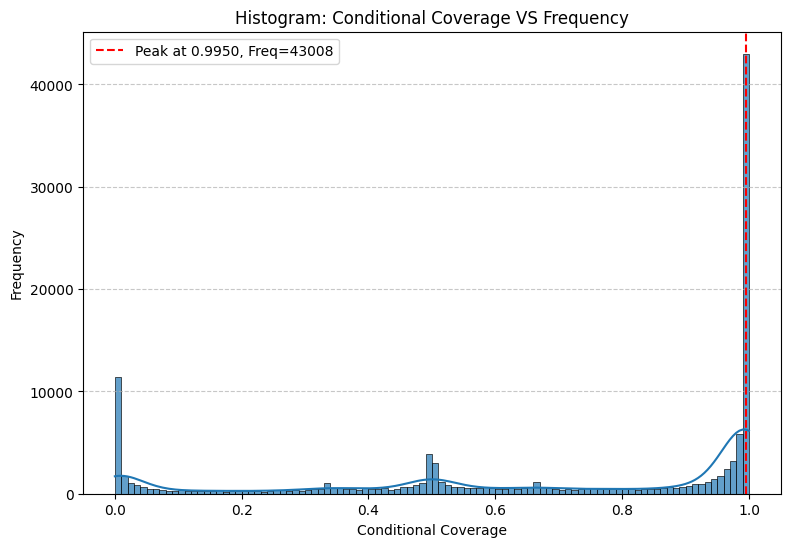

43008 (34.58%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8503 ± 0.0025
Final Average Prediction Set Size: 3.01 ± 0.01
Final Average Coverage: 0.7998 ± 0.0040
Final Average Real Probability: 0.6519 ± 0.0040


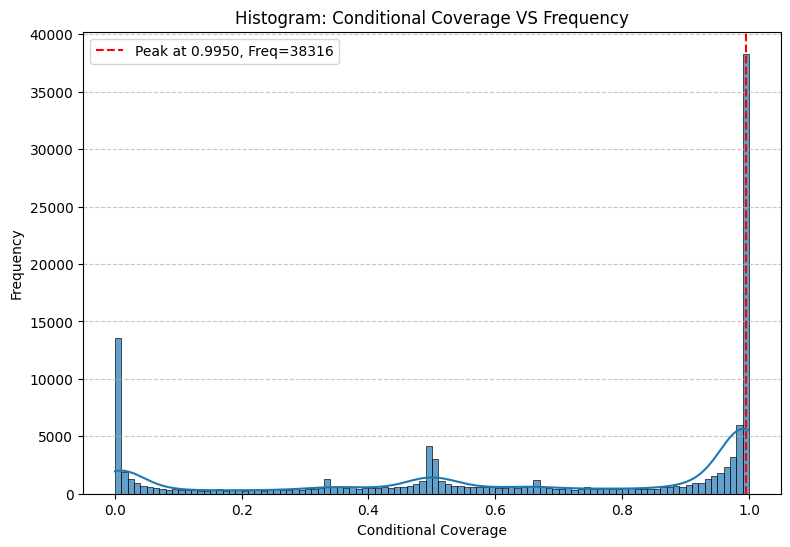

38316 (30.81%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8347 ± 0.0038
Final Average Prediction Set Size: 2.77 ± 0.02
Final Average Coverage: 0.7997 ± 0.0038
Final Average Real Probability: 0.6663 ± 0.0040


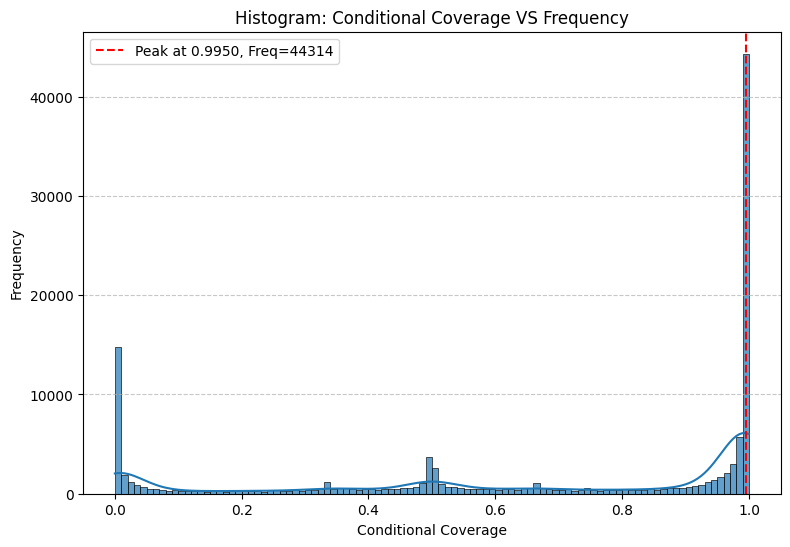

44314 (35.63%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8233 ± 0.0017
Final Average Prediction Set Size: 6.57 ± 0.09
Final Average Coverage: 0.8011 ± 0.0041
Final Average Real Probability: 0.6821 ± 0.0041


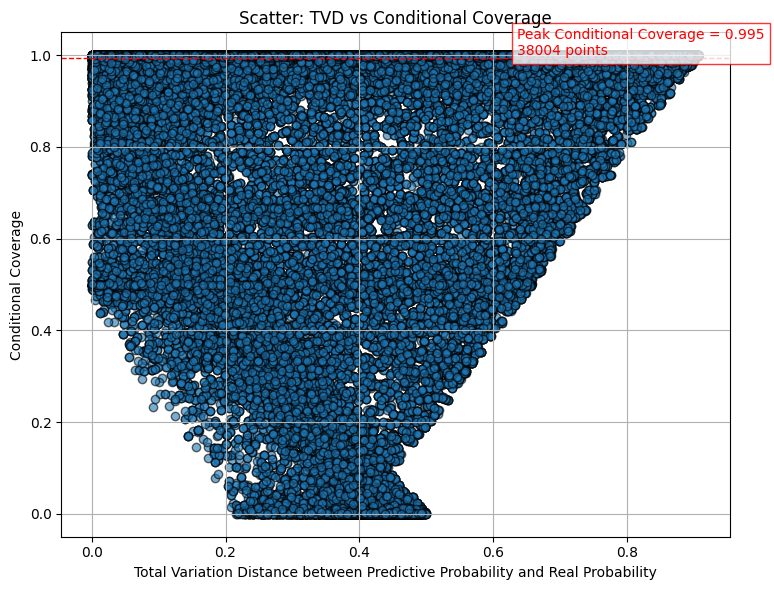

Peak Conditional Coverage = 0.995, with 38004 samples

=== Count Regions Summary ===
33704 (27.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
28425 (22.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
48772 (39.2%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.96438']
  Real Probability Set      : ['0.98881']
Sample 2:
  Predictive Probability Set: ['0.53139', '0.46861']
  Real Probability Set      : ['0.50001', '0.49999']
Sample 3:
  Predictive Probability Set: ['0.81375']
  Real Probability Set      : ['0.98547']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.94908']
  Real Probability Set      : ['0.18150']
Sample 2:
  Predictive Probability Set: ['0.21826', '0.19246', '0.14516', '0.06087', '0.05332', '0.05264', '0.03419', '0.03212', '0.03052']
  Real Probability Set      : ['0.00011', '0.09220', '0.00531', '0.

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8503 ± 0.0025
Final Average Prediction Set Size: 3.01 ± 0.01
Final Average Coverage: 0.7998 ± 0.0040
Final Average Real Probability: 0.6519 ± 0.0040


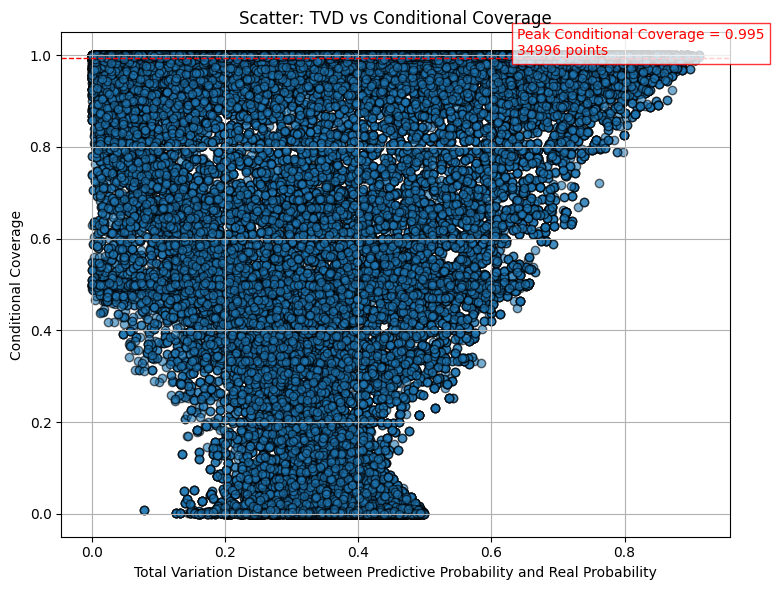

Peak Conditional Coverage = 0.995, with 34996 samples

=== Count Regions Summary ===
36228 (29.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
23565 (18.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
55598 (44.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.82514']
  Real Probability Set      : ['0.99402']
Sample 2:
  Predictive Probability Set: ['0.86384']
  Real Probability Set      : ['0.89922']
Sample 3:
  Predictive Probability Set: ['0.86909']
  Real Probability Set      : ['0.98821']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64100', '0.20344']
  Real Probability Set      : ['0.04284', '0.00045']
Sample 2:
  Predictive Probability Set: ['0.12985', '0.08827', '0.07495', '0.07326', '0.05216', '0.04268', '0.04004', '0.03797', '0.03461', '0.02417']
  Real Probability Set      : ['0.00000', '0.00000', '0.

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8347 ± 0.0038
Final Average Prediction Set Size: 2.77 ± 0.02
Final Average Coverage: 0.7997 ± 0.0038
Final Average Real Probability: 0.6663 ± 0.0040


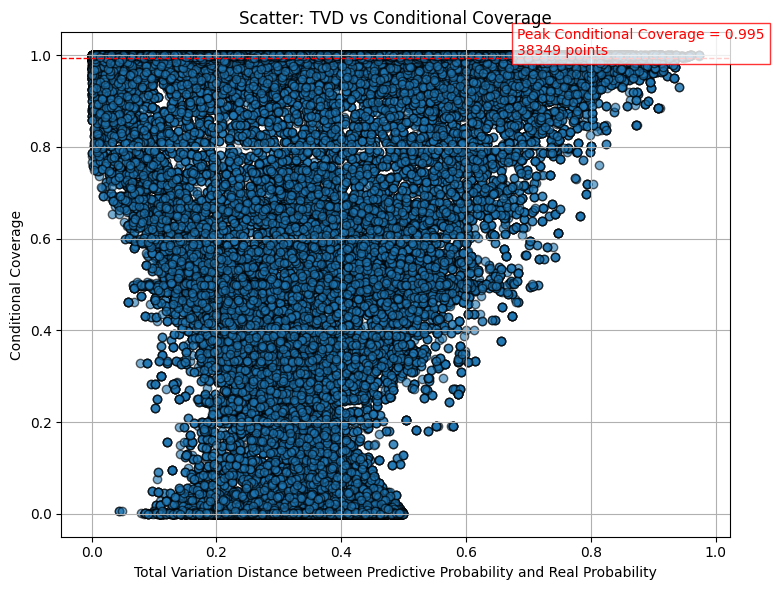

Peak Conditional Coverage = 0.995, with 38349 samples

=== Count Regions Summary ===
37608 (30.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24039 (19.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
52016 (41.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.88043']
  Real Probability Set      : ['0.98693']
Sample 2:
  Predictive Probability Set: ['0.82573']
  Real Probability Set      : ['0.91882']
Sample 3:
  Predictive Probability Set: ['0.48122', '0.39887', '0.08290', '0.01739']
  Real Probability Set      : ['0.48708', '0.47486', '0.02157', '0.01535']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80044']
  Real Probability Set      : ['0.00116']
Sample 2:
  Predictive Probability Set: ['0.28637', '0.10279', '0.09009', '0.07503', '0.04911', '0.04710', '0.04295']
  Real Probability Set      : ['0.00120', '0.

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)